                                                                      MAJOR PROJECT 

                                                              Price prediction for AirBNB

CASE STUDY - Price Prediction(Airbnb)

Airbnb, Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.

We have a data of 74111 Airbnb properties across the nations. Based on this data build a simple and multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.

In [43]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [44]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("c://Users//soumy//OneDrive//Desktop//adverk.projects//AirBNB.csv")  

C:\Users\soumy\AppData\Local\Temp\ipykernel_53688\2970231155.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("c://Users//soumy//OneDrive//Desktop//adverk.projects//AirBNB.csv")


### EDA

In [45]:
# Check top few records to get a feel of the data structure
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [46]:
# drop the id column as it is useless for the model
df = df.drop('id', axis=1)

In [47]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [49]:
df.describe(include="all")

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,74106,74108.000000,73908.000000,74103,74107,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,41308,NaN,NaN,32500,54399,54660,NaN,NaN,NaN,NaN
mean,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.265797,1.710868,4.782069
std,NaN,2.153603,0.582054,NaN,NaN,NaN,7.836556,0.852149,1.254142,0.717394
min,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356


### unique values for categorical variables

In [50]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ROOM_TYPE :  3
room_type
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: count, dtype: int64


CANCELLATION_POLICY :  3
cancellation_policy
moderate    19060
flexible    22543
strict      32500
Name: count, dtype: int64


CLEANING_FEE :  2
cleaning_fee
False    19708
True     54399
Name: count, dtype: int64


INSTANT_BOOKABLE :  2
instant_bookable
t    19451
f    54660
Name: count, dtype: int64




### Converting Instant_bookable from 'f' and 't' to boolean

In [51]:
df.instant_bookable.replace(['f','t'],[False,True],inplace=True )

C:\Users\soumy\AppData\Local\Temp\ipykernel_53688\241833483.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.instant_bookable.replace(['f','t'],[False,True],inplace=True )
C:\Users\soumy\AppData\Local\Temp\ipykernel_53688\241833483.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.instant

### Converting categorical to dummy variables

In [52]:
df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee'],drop_first=True)

In [53]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.0,1.0,1.0,5.010635,False,False,False,True,True
1,7.0,1.0,True,93.0,3.0,3.0,5.129899,False,False,False,True,True
2,5.0,1.0,True,92.0,1.0,3.0,4.976734,False,False,True,False,True
3,4.0,1.0,False,NaN,2.0,2.0,6.620073,False,False,False,False,True
4,2.0,1.0,True,40.0,0.0,1.0,4.744932,False,False,True,False,True


In [54]:
# Are there any missing values ?
df.isnull().sum()

accommodates                        3
bathrooms                         203
instant_bookable                    0
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
dtype: int64

### Imputing missing values

In [55]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()        

accommodates                    0
bathrooms                       0
instant_bookable                0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
dtype: int64

In [56]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,5.010635,False,False,False,True,True
1,7.0,1.0,True,93.000000,3.0,3.0,5.129899,False,False,False,True,True
2,5.0,1.0,True,92.000000,1.0,3.0,4.976734,False,False,True,False,True
3,4.0,1.0,False,94.067365,2.0,2.0,6.620073,False,False,False,False,True
4,2.0,1.0,True,40.000000,0.0,1.0,4.744932,False,False,True,False,True


In [57]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,2.153559,0.581256,6.896002,0.851620,1.253033,0.717394
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,93.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,94.067365,1.000000,1.000000,4.709530
75%,4.000000,1.000000,99.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


### Checking for duplicates

In [58]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 19998


In [59]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (74111, 12)
After (54113, 12)


In [60]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

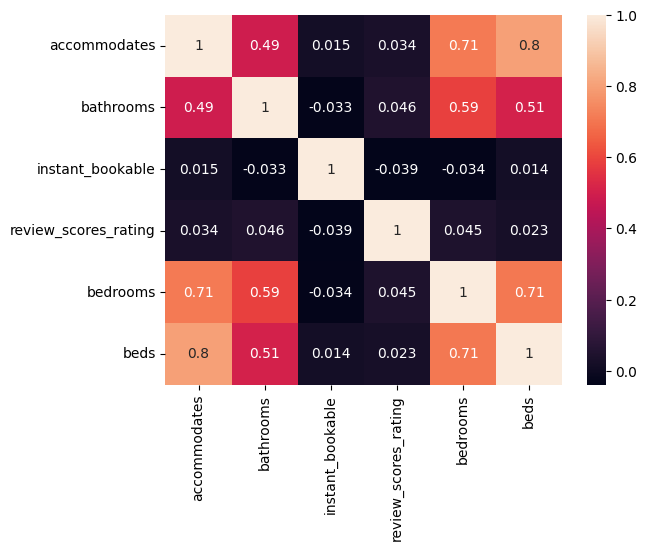

In [61]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

In [62]:
cor= df.corr()
cor

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
accommodates,1.000000,0.488898,0.015030,0.033684,0.710316,0.798582,0.557965,-0.425027,-0.114077,-0.064483,0.186171,0.183079
bathrooms,0.488898,1.000000,-0.033120,0.046480,0.587933,0.506511,0.358881,-0.118486,0.009535,-0.066399,0.091055,0.054872
instant_bookable,0.015030,-0.033120,1.000000,-0.038999,-0.034249,0.014220,-0.068720,0.046699,0.006661,-0.021625,0.011192,0.010614
review_scores_rating,0.033684,0.046480,-0.038999,1.000000,0.044518,0.022921,0.115660,-0.062274,-0.028324,0.055492,-0.033774,0.022540
bedrooms,0.710316,0.587933,-0.034249,0.044518,1.000000,0.706420,0.488152,-0.242113,-0.071759,-0.061721,0.128676,0.115876
beds,0.798582,0.506511,0.014220,0.022921,0.706420,1.000000,0.431630,-0.332849,-0.017636,-0.066828,0.165857,0.137020
log_price,0.557965,0.358881,-0.068720,0.115660,0.488152,0.431630,1.000000,-0.494904,-0.247532,-0.064918,0.118422,0.101150
room_type_Private room,-0.425027,-0.118486,0.046699,-0.062274,-0.242113,-0.332849,-0.494904,1.000000,-0.134930,0.029346,-0.119489,-0.168835
room_type_Shared room,-0.114077,0.009535,0.006661,-0.028324,-0.071759,-0.017636,-0.247532,-0.134930,1.000000,-0.029885,-0.025445,-0.088777
cancellation_policy_moderate,-0.064483,-0.066399,-0.021625,0.055492,-0.061721,-0.066828,-0.064918,0.029346,-0.029885,1.000000,-0.560500,0.056688


In [63]:
df.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,5.010635,False,False,False,True,True
1,7.0,1.0,True,93.000000,3.0,3.0,5.129899,False,False,False,True,True
2,5.0,1.0,True,92.000000,1.0,3.0,4.976734,False,False,True,False,True
3,4.0,1.0,False,94.067365,2.0,2.0,6.620073,False,False,False,False,True
4,2.0,1.0,True,40.000000,0.0,1.0,4.744932,False,False,True,False,True


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54113 entries, 0 to 74110
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54113 non-null  float64
 1   bathrooms                     54113 non-null  float64
 2   instant_bookable              54113 non-null  bool   
 3   review_scores_rating          54113 non-null  float64
 4   bedrooms                      54113 non-null  float64
 5   beds                          54113 non-null  float64
 6   log_price                     54113 non-null  float64
 7   room_type_Private room        54113 non-null  bool   
 8   room_type_Shared room         54113 non-null  bool   
 9   cancellation_policy_moderate  54113 non-null  bool   
 10  cancellation_policy_strict    54113 non-null  bool   
 11  cleaning_fee_True             54113 non-null  bool   
dtypes: bool(6), float64(6)
memory usage: 3.2 MB


### Outlier Checks

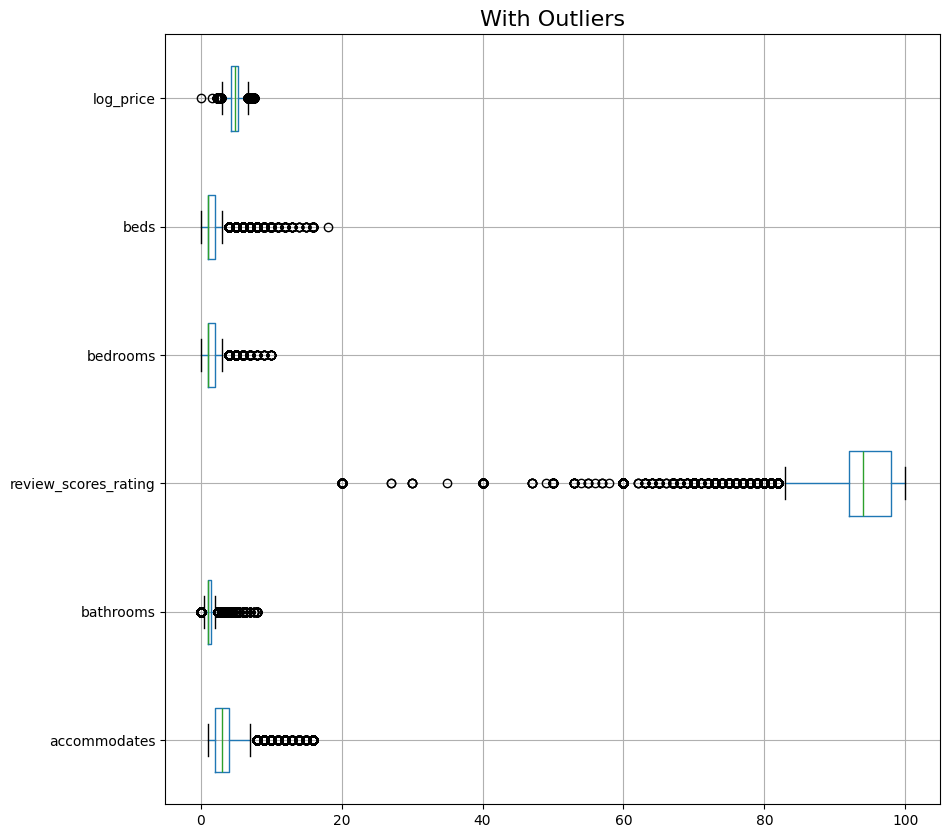

In [ ]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [66]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [67]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

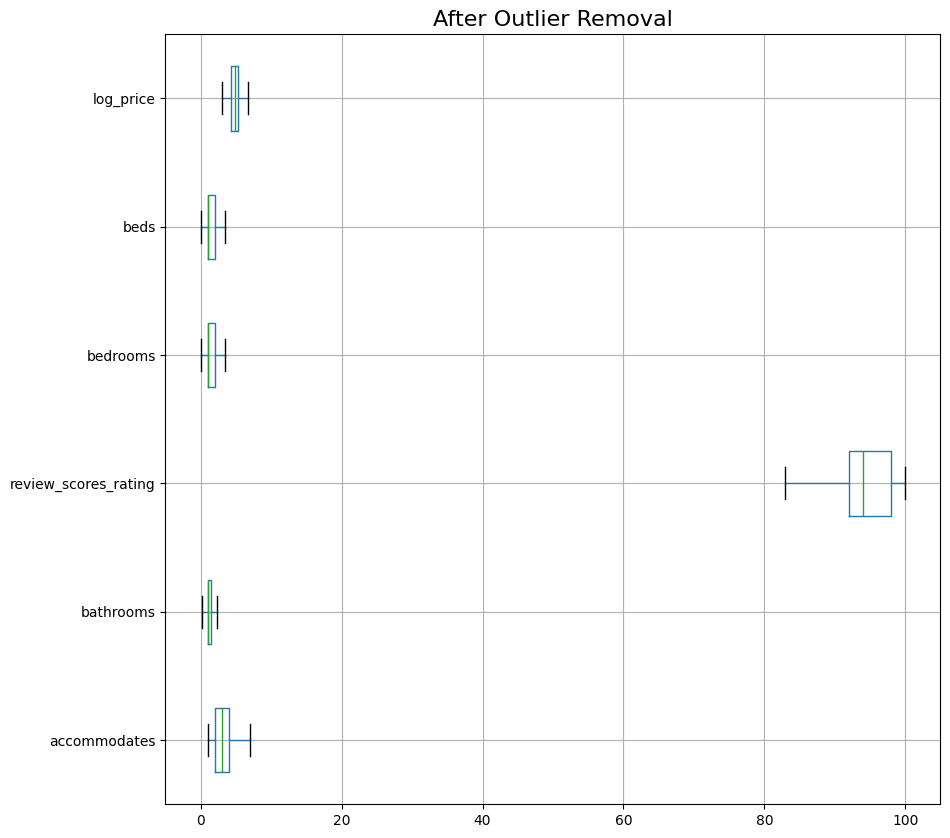

In [68]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

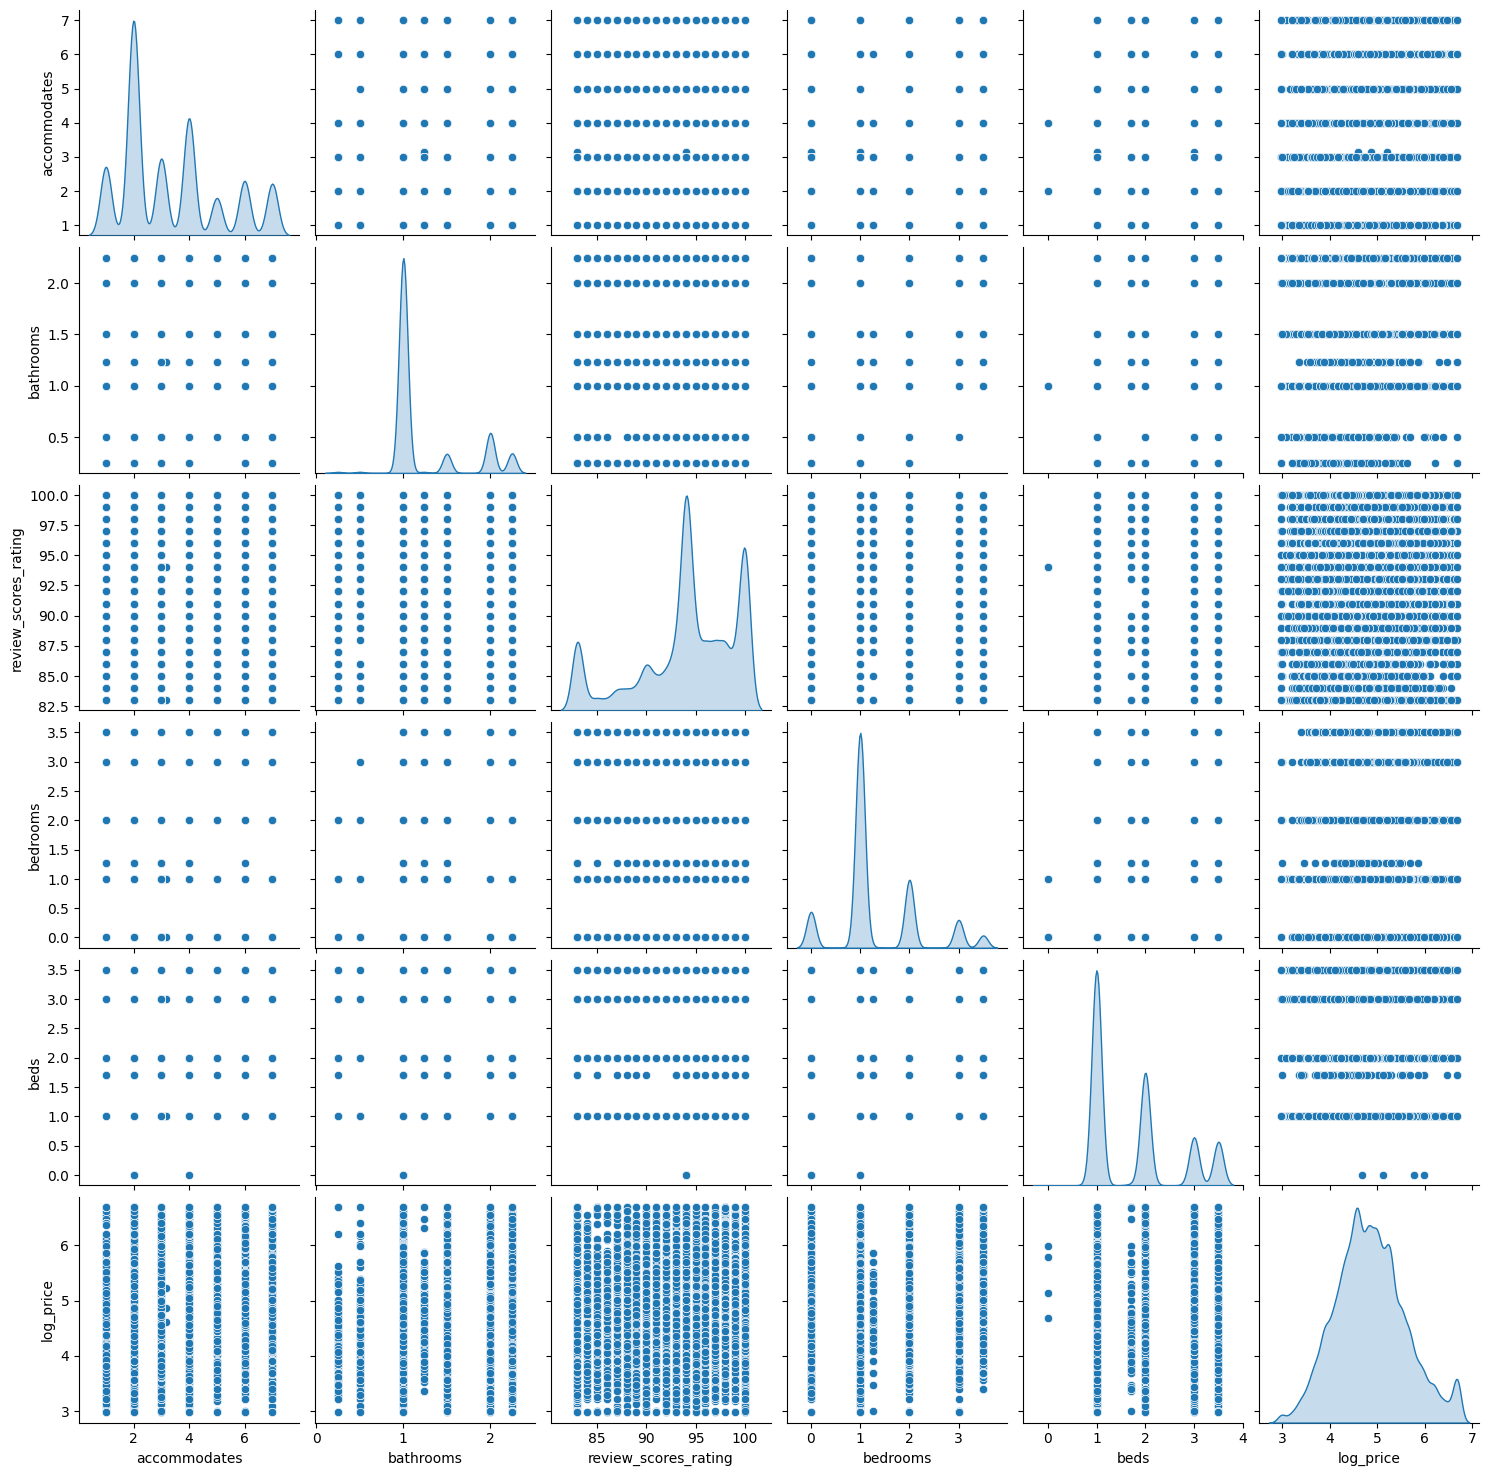

In [69]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

### Train-Test Split

- The will code separate the predictor variables (stored in X) from the target variable (stored in y)
- This is a common step in machine learning tasks where we want to predict the target variable ('log_price') based on the predictor variables.

In [70]:
# Copy all the predictor variables into X dataframe
X = df.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df[['log_price']]

In [71]:
X.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True
0,3.0,1.0,False,100.000000,1.0,1.0,False,False,False,True,True
1,7.0,1.0,True,93.000000,3.0,3.0,False,False,False,True,True
2,5.0,1.0,True,92.000000,1.0,3.0,False,False,True,False,True
3,4.0,1.0,False,94.067365,2.0,2.0,False,False,False,False,True
4,2.0,1.0,True,83.000000,0.0,1.0,False,False,True,False,True


In [72]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regression Model

In [73]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [74]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for accommodates is 0.09505750537686558
The coefficient for bathrooms is 0.18080416863721477
The coefficient for instant_bookable is -0.06503896431474679
The coefficient for review_scores_rating is 0.011701869399644654
The coefficient for bedrooms is 0.15805881436414912
The coefficient for beds is -0.04507899480970068
The coefficient for room_type_Private room is -0.6115570888488913
The coefficient for room_type_Shared room is -1.081804889194152
The coefficient for cancellation_policy_moderate is -0.060015221396403744
The coefficient for cancellation_policy_strict is -0.005822870628089269
The coefficient for cleaning_fee_True is -0.08187381765071977


In [75]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.4292638017758272


In [76]:
# R square on training data
regression_model.score(X_train, y_train)

0.5082917563299905

50% of the variation in the log_price is explained by the predictors in the model for train set

In [77]:
# R square on testing data
regression_model.score(X_test, y_test)

0.5019765734338828

In [78]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

np.float64(0.5159255811569989)

In [79]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

np.float64(0.519786761438849)

### Linear Regression using statsmodels

In [80]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,log_price
50743,3.0,1.0,False,94.067365,2.0,2.0,False,False,False,False,True,5.010635
12586,5.0,2.0,False,92.000000,2.0,2.0,False,False,False,True,True,5.703782
4152,4.0,1.0,False,100.000000,2.0,2.0,False,False,False,True,False,5.857933
10059,2.0,1.5,True,94.067365,1.0,1.0,True,False,False,True,False,5.129899
38268,4.0,1.0,False,84.000000,1.0,2.0,False,False,False,True,True,4.564348


In [81]:
data_train.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

data_test.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

In [82]:
data_train.columns

Index(['accommodates', 'bathrooms', 'instant_bookable', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_private_room', 'room_type_shared_room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'log_price'],
      dtype='object')

In [83]:
expr= 'log_price ~ accommodates + bathrooms + instant_bookable+review_scores_rating +bedrooms + beds + room_type_private_room + room_type_shared_room  + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee_True'

In [84]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                               3.429264
instant_bookable[T.True]               -0.065039
room_type_private_room[T.True]         -0.611557
room_type_shared_room[T.True]          -1.081805
cancellation_policy_moderate[T.True]   -0.060015
cancellation_policy_strict[T.True]     -0.005823
cleaning_fee_True[T.True]              -0.081874
accommodates                            0.095058
bathrooms                               0.180804
review_scores_rating                    0.011702
bedrooms                                0.158059
beds                                   -0.045079
dtype: float64

In [85]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     3813.
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:44:07   Log-Likelihood:                -30728.
No. Observations:               40584   AIC:                         6.148e+04
Df Residuals:                   40572   BIC:                         6.158e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [86]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('log_price',axis=1))-data_train['log_price'])**2)

In [87]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

np.float64(0.5159255811569989)

In [88]:
np.sqrt(lm1.mse_resid) #another way

np.float64(0.5160018732951103)

In [89]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

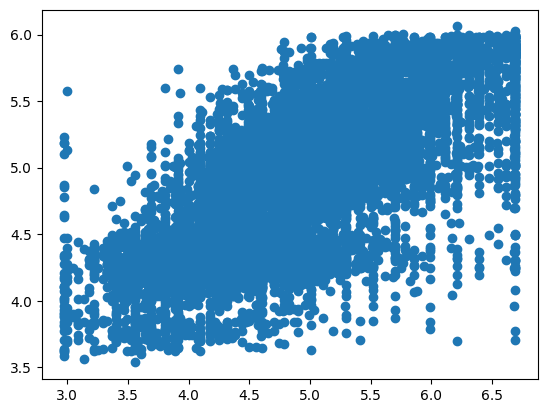

In [90]:
plt.scatter(y_test['log_price'], y_pred)
plt.show()

In [91]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (-0.61) * room_type_private_room[T.True] + (-1.08) * room_type_shared_room[T.True] + (-0.06) * cancellation_policy_moderate[T.True] + (-0.01) * cancellation_policy_strict[T.True] + (-0.08) * cleaning_fee_True[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + 

 # Conclusion

The final Linear Regression equation is  
  
  
log_price = (3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True  
  
When accommodates increases by 1 unit, log_price increases by 0.1 units, keeping all other predictors constant.  
similarly, when no. of bathrooms increases by 1 unit, log_price increases by 0.18 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.08. This implies, when the room type is shared room, the log_price decreases by 1.08 units, keeping all other predictors constant. Similarly, 

The coefficient (-0.01) for cancellation_policy_strict represents the estimated change in log_price for a property with a strict cancellation policy compared to a flexible cancellation policy.

